In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [6]:
import sys
import os
import glob
import importlib
import multiprocessing as mp
import itertools
import math
import random 

from matplotlib import pyplot as plt
import scipy.sparse as sparse
import scipy.io as sio
import scipy.stats as stats
import scipy.spatial.distance as dist
import numpy as np
import h5py
from tqdm import tqdm
import pandas as pd
import tables
import deepdish as dd

sys.path.append('/Users/johnmarshall/Documents/Analysis/PythonAnalysisScripts/caimandata/post_cmfe_analysis')
import python_utils_jjm as jjm_utils

In [7]:
results_file = '/Volumes/My_Passport/cnmfe_analysis_files/GRIN011/H10_M19_S59_01242019/04-May_00_39_45_wsortdecisions_out.mat'
results = sio.loadmat(results_file)

##plot contours from A, spatial profile of detected neurons, on correlation image (Cn)

In [45]:
#input list to plot
to_plot = [1, 20, 90]

In [8]:
# A is stored as "sparse matrix", convert to dense 
sparse.issparse(results['A'])
A = np.array(results['A'].todense())

In [9]:
# Correlation image 
Cn = results['Cn']
d1, d2 = np.shape(Cn)
d, nr = np.shape(A)

In [10]:
# threshold for contour
maxthr=0.2
nrgthr=0.9

In [11]:
# mesh grid that represents the x, y dimensions of the image
x, y = np.mgrid[0:d1:1, 0:d2:1]

<IPython.core.display.Javascript object>


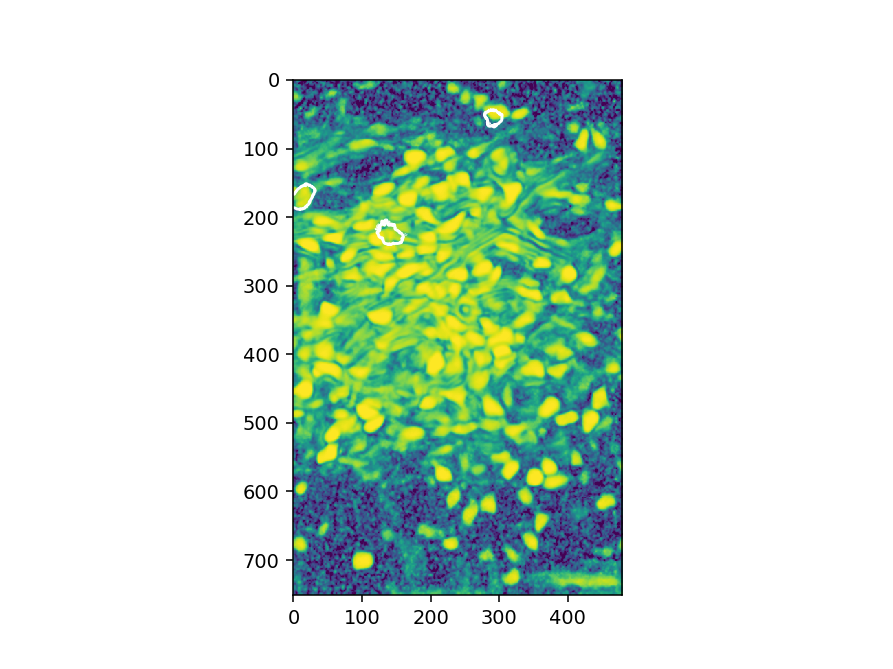

In [60]:
#create plot
%matplotlib notebook 
ax = plt.gca()
cmap=None
plt.imshow(Cn, interpolation=None, cmap=cmap, vmin=np.percentile(Cn[~np.isnan(Cn)], 1),vmax=np.percentile(Cn[~np.isnan(Cn)], 99))

In [61]:
coordinates = []
cm = jjm_utils.com(A, d1, d2)

In [62]:
if to_plot:
    cells_to_plot = to_plot

In [63]:
cells_to_plot

[1, 20, 90]

In [64]:
if to_plot:
    cells_to_plot = to_plot
else:
    max_number=nr
    cells_to_plot = range(np.minimum(nr, max_number))

for i in cells_to_plot:
    #pars = dict(kwargs)
    Bvec = A[:, i].flatten()
    #normalize spatial contours to 1 
    Bvec /= np.max(Bvec)
    thr = maxthr
# reshape to dimensions of image 
    Bmat = np.reshape(Bvec, np.shape(Cn), order='F')
    colors = 'w'
    cs = plt.contour(y, x, Bmat, [thr], colors=colors)